## Списки

Вам дан список. Поменяйте местами первую и вторую половину списка.

In [5]:
list = [1, 2, 3, 4, 5, 6]

middle = len(list) // 2
first = list[:middle]
second = list[middle:]
list = second + first

list

[4, 5, 6, 1, 2, 3]

Вам дан список. Поменяйте в нём местами блоки элементов: каждый нечётный со первого по пятый с начала с каждым чётный со второго по пятый с конца. 

In [126]:
##not finished

list = [1, 2, 3, 4, 5, 6, 7, 8]

list[2], list[len(list) - 5] = list[len(list) - 5], list[2]
list[4], list[len(list) - 3] = list[len(list) - 3], list[4]

list

[1, 2, 4, 3, 6, 5, 7, 8]

## Генераторы

Вам дан список. Создайте новый список, в котором останутся только чётные элементы кратные трём. 

In [13]:
list = [1, 2, 3, 4, 5, 6, 7, 8, 12, 18]

new_list = [x for x in list if (x % 2 == 0) and (x % 3 == 0)]

new_list

[6, 12, 18]

Вам дан список. Для него и ивертированного по порядку списка выведите пары (x, y) в новом списке.

In [102]:
reverse_list = [1, 2, 3, 4, 5, 6, 7, 8]
list = reverse_list.copy()
reverse_list.reverse()
new_list = [(list[i], reverse_list[i]) for i in range(len(list))]

new_list

[(1, 8), (2, 7), (3, 6), (4, 5), (5, 4), (6, 3), (7, 2), (8, 1)]

## Встроенные функции

Вам дана строка. Выведите сумму ascii-кодов элементов в строке. 

In [19]:
s = "I LOVE PYTHON SO MUCH"
s_list = [ord(c) for c in s]

sum(s_list)

1456

Вам дана строка. Выведите строку, выведите пары (элемент строки, порядковый номер).

In [31]:
s = "I LOVE PYTHON SO MUCH"
print(s)

s_list = [c for c in s]

pairs = [(c, i) for (i, c) in enumerate(s_list)]

pairs

I LOVE PYTHON SO MUCH


[('I', 0),
 (' ', 1),
 ('L', 2),
 ('O', 3),
 ('V', 4),
 ('E', 5),
 (' ', 6),
 ('P', 7),
 ('Y', 8),
 ('T', 9),
 ('H', 10),
 ('O', 11),
 ('N', 12),
 (' ', 13),
 ('S', 14),
 ('O', 15),
 (' ', 16),
 ('M', 17),
 ('U', 18),
 ('C', 19),
 ('H', 20)]

## NumPy

Дан массив 16х16
Создайте новый массив 4х4 , элементы которого будут суммой блоков 4х4 исходного массива

In [33]:
import numpy as np

array = np.ones((16, 16))
new_array = array.reshape(4, 4, 4, 4).sum(axis=(1,3))

new_array

array([[16., 16., 16., 16.],
       [16., 16., 16., 16.],
       [16., 16., 16., 16.],
       [16., 16., 16., 16.]])

Дан массив, вставьте между каждым значением сумму соседних элементов

In [37]:
array = np.arange(9)

new_array = ((array + np.roll(array, -1)) / 2.0)

np.vstack([array, new_array]).flatten('F')[:-1]

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
       6.5, 7. , 7.5, 8. ])

## Pandas

https://www.kaggle.com/datasets/ishadss/productivity-prediction-of-garment-employees

- Какие типы данных присутствуют в датасете?
- Есть ли в датасете пропущенные значения? Если да, то сколько и где?
- Постройте график распределения переменной `actual_productivity`.
- Постройте heatmap для матрицы корреляции числовых переменных в датасете.
- Постройте pairplot для всех переменных.
- Постройте boxplot для всех переменных и выведете объекты которые являются выбросами (строки из датафрейма).
- Посчитайте различные статестические показатели (среднее, медиана, максимум, минимум) для различных категорий в колонке `quarter` *(т.е. отдельно какие показатели у класса quarter1, какие у класса quarter2 и и т.д.)*.
- Разделите колонку `date` на три: день, месяц, год.

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataframe = pd.read_csv('garments_worker_productivity.csv')

dataframe.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [121]:
dataframe.dtypes.unique()

array([dtype('O'), dtype('int64'), dtype('float64')], dtype=object)

In [51]:
dataframe['wip'].isna().sum()

506

(array([ 34.,  59.,  38.,  74., 137., 250., 340., 151., 104.,  10.]),
 array([0.23370548, 0.32237868, 0.41105188, 0.49972508, 0.58839829,
        0.67707149, 0.76574469, 0.85441789, 0.9430911 , 1.0317643 ,
        1.1204375 ]),
 <BarContainer object of 10 artists>)

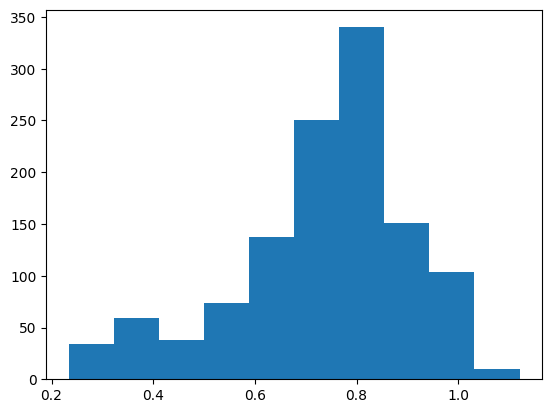

In [52]:
plt.hist(dataframe['actual_productivity'], bins = 10)

/var/folders/2n/vr66w5914sl2jy4d6fsjbtp40000gn/T/ipykernel_50886/3561935382.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dataframe_copy.loc[:,columns].corr()


<AxesSubplot: >

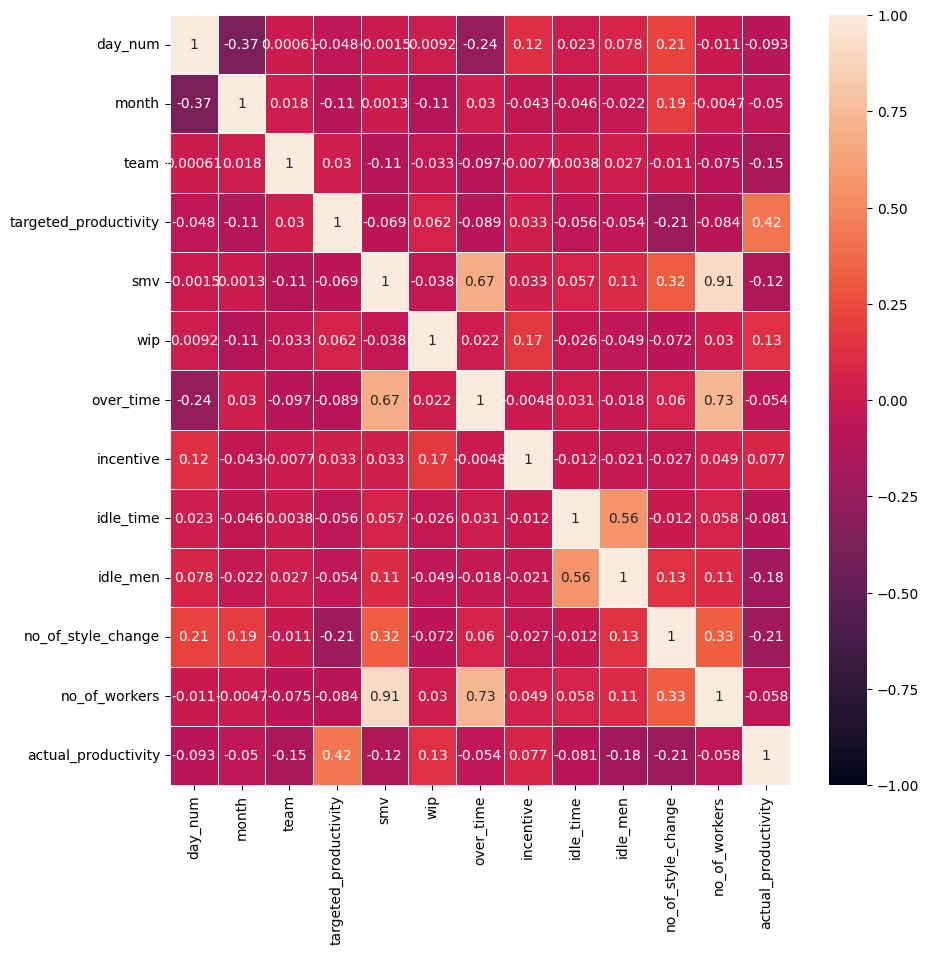

In [142]:
columns = dataframe_copy.columns.values.tolist()
columns.remove('year')

corr_matrix = dataframe_copy.loc[:,columns].corr()

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, linewidths=.5, ax=ax)

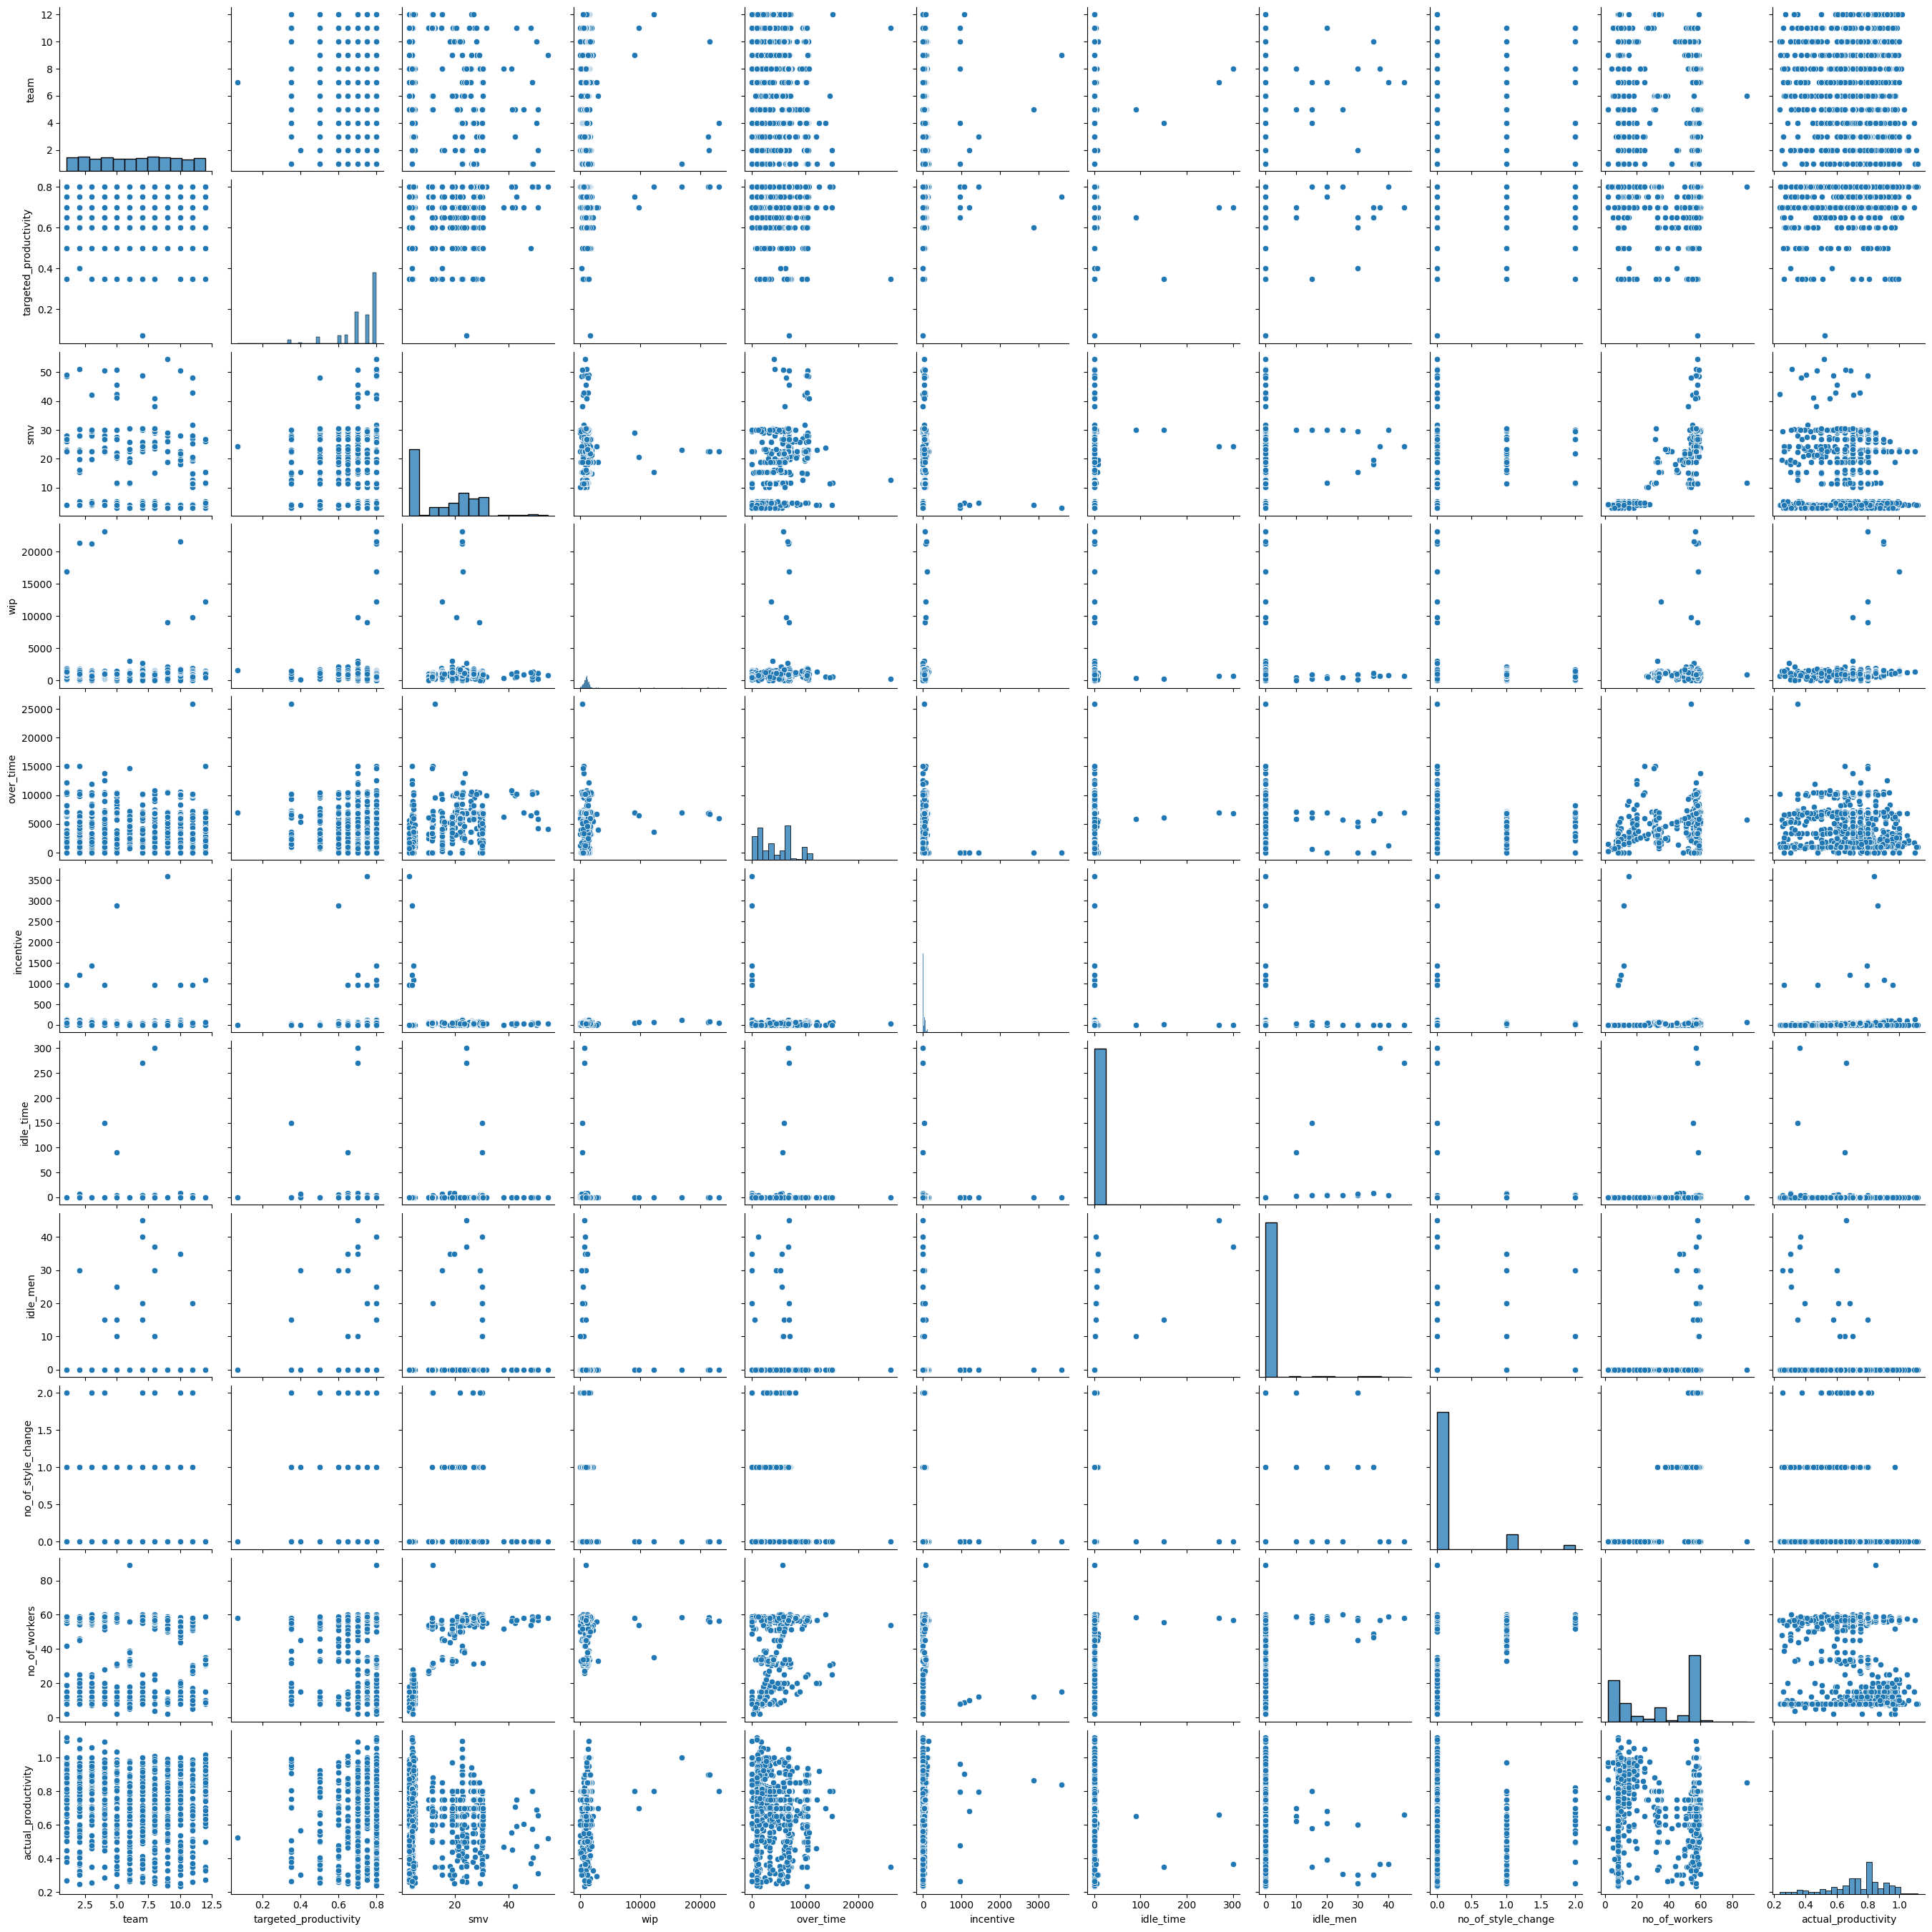

In [59]:
sns.pairplot(dataframe)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(1, 0, 'team'),
  Text(2, 0, 'targeted_productivity'),
  Text(3, 0, 'smv'),
  Text(4, 0, 'wip'),
  Text(5, 0, 'over_time'),
  Text(6, 0, 'incentive'),
  Text(7, 0, 'idle_time'),
  Text(8, 0, 'idle_men'),
  Text(9, 0, 'no_of_style_change'),
  Text(10, 0, 'no_of_workers'),
  Text(11, 0, 'actual_productivity')])

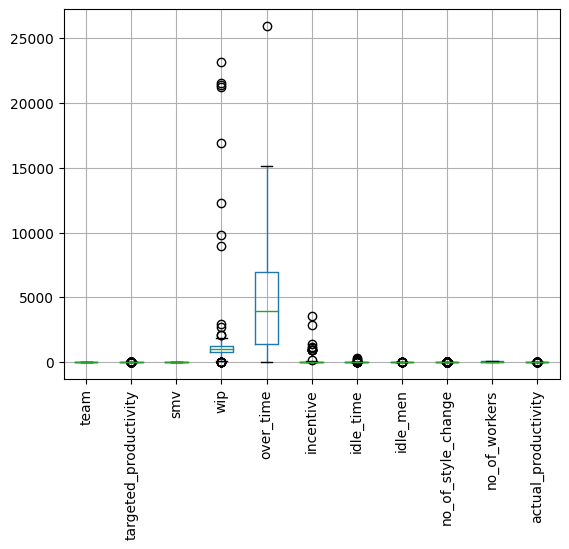

In [66]:
dataframe.boxplot()
plt.xticks(rotation=90)

In [70]:
Q1 = dataframe.quantile(0.25)
Q3 = dataframe.quantile(0.75)
IQR = Q3 - Q1

dataframe[((dataframe < (Q1 - 1.5*IQR)) | (dataframe > (Q3 + 1.5*IQR))).any(axis=1)]

/var/folders/2n/vr66w5914sl2jy4d6fsjbtp40000gn/T/ipykernel_50886/213571337.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = dataframe.quantile(0.25)
/var/folders/2n/vr66w5914sl2jy4d6fsjbtp40000gn/T/ipykernel_50886/213571337.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = dataframe.quantile(0.75)
/var/folders/2n/vr66w5914sl2jy4d6fsjbtp40000gn/T/ipykernel_50886/213571337.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  dataframe[((dataframe < (Q1 - 1.

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
60,1/4/2015,Quarter1,finishing,Sunday,11,0.75,4.15,NaN,960,0,0.0,0,0,8.0,0.345833
125,1/7/2015,Quarter1,finishing,Wednesday,5,0.70,4.15,NaN,1440,0,0.0,0,0,8.0,0.330114
146,1/8/2015,Quarter2,sweing,Thursday,11,0.35,12.52,287.0,25920,38,0.0,0,0,54.0,0.349951
147,1/8/2015,Quarter2,sweing,Thursday,5,0.70,42.41,724.0,10260,0,0.0,0,0,57.0,0.233705
165,1/10/2015,Quarter2,sweing,Saturday,11,0.50,12.52,749.0,9540,38,0.0,0,0,53.0,0.673245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185,3/11/2015,Quarter2,sweing,Wednesday,2,0.75,16.10,971.0,5400,45,0.0,0,1,45.0,0.750141
1188,3/11/2015,Quarter2,sweing,Wednesday,5,0.70,26.82,992.0,6960,30,0.0,0,1,58.0,0.700557
1189,3/11/2015,Quarter2,sweing,Wednesday,8,0.70,30.48,914.0,6840,30,0.0,0,1,57.0,0.700505
1190,3/11/2015,Quarter2,sweing,Wednesday,6,0.70,23.41,1128.0,4560,40,0.0,0,1,38.0,0.700246


In [81]:
# dataframe.groupby('quarter').mean()
# dataframe.groupby('quarter').median()
# dataframe.groupby('quarter').max()
# dataframe.groupby('quarter').min()

In [137]:
dataframe_copy = dataframe.copy()
dataframe_copy.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [138]:
dates = dataframe_copy['date'].apply(lambda x: pd.Series(int(y) for y in str(x).split("/")))
dataframe_copy.head(20)

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
5,1/1/2015,Quarter1,sweing,Thursday,7,0.80,25.90,984.0,6720,38,0.0,0,0,56.0,0.800125
6,1/1/2015,Quarter1,finishing,Thursday,2,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.755167
7,1/1/2015,Quarter1,sweing,Thursday,3,0.75,28.08,795.0,6900,45,0.0,0,0,57.5,0.753683
8,1/1/2015,Quarter1,sweing,Thursday,2,0.75,19.87,733.0,6000,34,0.0,0,0,55.0,0.753098
9,1/1/2015,Quarter1,sweing,Thursday,1,0.75,28.08,681.0,6900,45,0.0,0,0,57.5,0.750428


In [139]:
dataframe_copy.insert(loc=0, column='day_num', value=dates[0])
dataframe_copy.insert(loc=1, column='month', value=dates[1])
dataframe_copy.insert(loc=2, column='year', value=dates[2])

In [141]:
dataframe_copy['year'].unique()

array([2015])